In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import cv2
%matplotlib inline
import pywt
import pywt.data

In [2]:
# Define a function to return some characteristics of the dataset 
def data_look(fp_list, notfp_list):
    data_dict = {}
    data_dict["n_fps"] = len(fp_list)
    data_dict["n_notfps"] = len(notfp_list)
    fp_img = mpimg.imread(fp_list[0])
    data_dict["image_shape"] = fp_img.shape
    data_dict["data_type"] = fp_img.dtype
    return data_dict

In [3]:
def visualize_images(input_images, num_cols, figure_name, cmap = None):
    fig, axes = plt.subplots((int)((len(input_images) + 1) /num_cols), num_cols, figsize=(24, 20))

    fig = plt.gcf()
    fig.canvas.set_window_title(figure_name)
    
    print(figure_name)
    
    for ax, image in zip(axes.flat, input_images):
        if(cmap == "gray" or cmap == 'hot'):
            ax.imshow(image, cmap=cmap)
        elif(image.shape[2]==1):
            ax.imshow(image[:,:,0], cmap = cmap)
        else:
            ax.imshow(image, cmap=cmap)

    plt.show()

In [4]:
import glob

#Read fps and not-fps images

#Data folders
fishplate_dir =     'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/'
non_fishplate_dir = 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/'

# images are divided up into fishplate and non-fishplate
fps = []
notfps = []

# Read fishplate images
images = glob.iglob(fishplate_dir + '*.jpg', recursive=True)
for image in images:
        fps.append(image)
        
# Read non-fishplate images
images = glob.iglob(non_fishplate_dir + '*.jpg', recursive=True)
for image in images:
        notfps.append(image)
    
data_info = data_look(fps, notfps)

print('Your function returned a count of', 
      data_info["n_fps"], 'fps and', 
      data_info["n_notfps"], 'nonfps')
print('of size: ',data_info["image_shape"], ' and data type:', 
      data_info["data_type"])

Your function returned a count of 66 fps and 66 nonfps
of size:  (100, 100, 3)  and data type: uint8


Example fp images


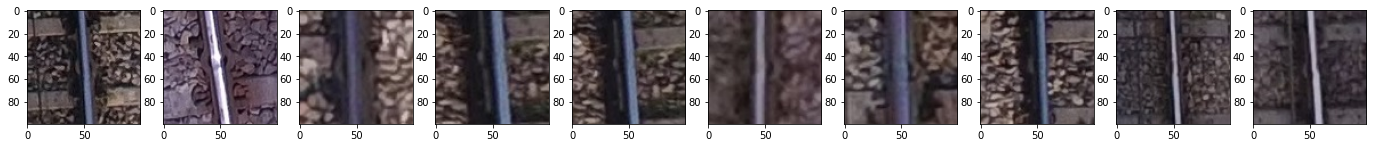

Example not-fp images


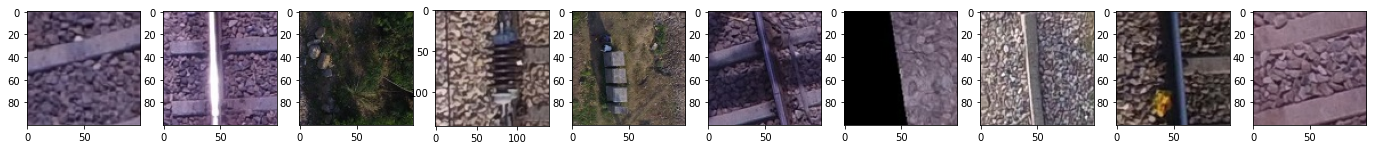

In [5]:
#Visualize some input images
import random

num_images = 10

# Just for fun choose random fp / not-fp indices and plot example images   
fps_samples = random.sample(list(fps), num_images)
notfp_samples = random.sample(list(notfps), num_images)
    
# Read in fp / not-fp images
fp_images = []
notfp_images = []
for sample in fps_samples:
    fp_images.append(mpimg.imread(sample))
    
for sample in notfp_samples:
    notfp_images.append(mpimg.imread(sample))

visualize_images(fp_images, num_images, "Example fp images")
visualize_images(notfp_images, num_images, "Example not-fp images")

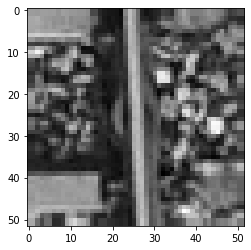

In [6]:
image = cv2.imread('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/1.jpg')
def waveleteTransform(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = np.float32(image)
    image /= 255

    coeffs2 = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure()
    for i, a in enumerate([LL]):
        ax = fig.add_subplot(1, 1, i + 1)
        ax.imshow(a, cmap=plt.cm.gray)
    resultimg = image.astype(np.uint8)
    return resultimg

plt.show()
if __name__ == '__main__':

        # loadImage & copy image
    image = cv2.imread('C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/1.jpg')
    image2 = waveleteTransform(image)
#     cv2.imshow('base Image', image)

In [7]:
def bin_spatial(img, size=(16, 16)):
    color1 = cv2.resize(img[:,:,0], size).ravel()
    color2 = cv2.resize(img[:,:,1], size).ravel()
    color3 = cv2.resize(img[:,:,2], size).ravel()
    return np.hstack((color1, color2, color3))

In [9]:
# def extract_features(imgs, color_space='RGB', spatial_size=(32, 32),
#                         hist_bins=16, hist_range=(0, 256),
#                         orient=16,pix_per_cell=16, cell_per_block=2, hog_channel=0,
#                         spatial_feat=True, hist_feat=True, hog_feat=True):
#     # Create a list to append feature vectors to
#     features = []
    
#     for img in imgs:
#         image_orig= cv2.imread(img)
#         images=[image_orig]
#         image_flipped= cv2.flip(image_orig,1)
#         images.append(image_flipped)

            
#         for image in images:
#             feature_image=None
#             if color_space != 'RGB':
#                 if color_space == 'HSV':
#                     feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
#                 elif color_space == 'LUV':
#                     feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
#                 elif color_space == 'HLS':
#                     feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
#                 elif color_space == 'YUV':
#                     feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
#                 elif color_space == 'YCrCb':
#                     feature_image = cv2.cvtColor(image, cv2.COLOR_RGB2YCrCb)
#             else: feature_image = np.copy(image) 
#             image_feature=[]
#             if spatial_feat==True:
#                 image_feature= image_features(feature_image, color_space, spatial_size) 

#             histogram_features=[]
#             if hist_feat==True:
#                 histogram_features= color_hist(feature_image, hist_bins, hist_range)

#             if hog_channel == 'ALL':
#                 hog_features = []
#                 for channel in range(feature_image.shape[2]):
#                     hog_features.append(get_hog_features(feature_image[:,:,channel], 
#                                         orient, pix_per_cell, cell_per_block, 
#                                         vis=False, feature_vec=True))
#                 hog_features = np.ravel(hog_features)        
#             else:
#                 hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                             pix_per_cell, cell_per_block, vis=False, feature_vec=True)
#             # Append the new feature vector to the features list
#     #         print(hog_features[0])
#     #         features.append(hog_features)
#             features.append(np.concatenate((image_feature, histogram_features,hog_features)))

       
#     return features

In [10]:
# def single_img_features(img, color_space='RGB', spatial_size=(32, 32),
#                         hist_bins=16, orient=16, 
#                         pix_per_cell=16, cell_per_block=2, hog_channel=0,
#                         spatial_feat=True, hist_feat=True, hog_feat=True):    
#     #1) Define an empty list to receive features
#     img_features = []
#     #2) Apply color conversion if other than 'RGB'
#     if color_space != 'RGB':
#         if color_space == 'HSV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
#         elif color_space == 'LUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
#         elif color_space == 'HLS':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
#         elif color_space == 'YUV':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
#         elif color_space == 'YCrCb':
#             feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
#     else: feature_image = np.copy(img)      
#     #3) Compute spatial features if flag is set
#     if spatial_feat == True:
# #         print(feature_image)
        
#         spatial_features = image_features(feature_image, size=spatial_size)
#         #4) Append features to list
#         img_features.append(spatial_features)
#     #5) Compute histogram features if flag is set
#     if hist_feat == True:
        
#         hist_features = color_hist(feature_image, nbins=hist_bins)
#         #6) Append features to list
#         img_features.append(hist_features)
#     #7) Compute HOG features if flag is set
#     if hog_feat == True:
#         if hog_channel == 'ALL':
#             hog_features = []
#             for channel in range(feature_image.shape[2]):
#                 hog_features.extend(get_hog_features(feature_image[:,:,channel], 
#                                     orient, pix_per_cell, cell_per_block, 
#                                     vis=False, feature_vec=True))      
#         else:
#             hog_features = get_hog_features(feature_image[:,:,hog_channel], orient, 
#                         pix_per_cell, cell_per_block, vis=False, feature_vec=True)
#         #8) Append features to list
       
#         img_features.append(hog_features)

#     #9) Return concatenated array of features
#     return np.concatenate(img_features)

In [11]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5), offset=0):
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = (img.shape[0]//2)+offset 
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]

    window_list = []

    
    scales=[1,1,1.5,1.5]
    ystart=y_start_stop[0]
    for scale in scales:
        over_x= xy_overlap[0]
        over_y= xy_overlap[1]
        width= xy_window[0]*scale
        height= xy_window[1]*scale
        c= y_start_stop[0]
        
        for row in range(2):
            col=0
            endx=0
            image_width= img.shape[1]
            
            while(endx<image_width):
                
                startx = x_start_stop[0]+ col*width*(1-over_x)
                endx = startx + width
                starty = ystart+ row*height*(1-over_y)
                endy = starty + height
                if(endx-startx==endy-starty and endx-startx!=0):
                    window_list.append(((int(startx), int(starty)), (int(endx), int(endy)), width/64.0))
                col+=1
    return window_list

In [12]:
# color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
# orient = 16  # HOG orientations
# pix_per_cell = 16 # HOG pixels per cell
# cell_per_block = 2 # HOG cells per block
# hog_channel = 0 # Can be 0, 1, 2, or "ALL"
# spatial_size = (32, 32) # Spatial binning dimensions
# hist_bins = 16    # Number of histogram bins
# spatial_feat = True # Spatial features on or off
# hist_feat = True # Histogram features on or off
# hog_feat = True # HOG features on or off
# y_start_stop = [300, 500] # Min and max in y to search in slide_window()

In [13]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

test_image = 'C:/Users/hp/Desktop/Mod1-IITR/test/55.JPG'
feature_image = cv2.imread(test_image)
feature_image = cv2.cvtColor(feature_image, cv2.COLOR_BGR2RGB)
plt.imshow(feature_image)
windows = slide_window(feature_image, x_start_stop=[None, None], y_start_stop=y_start_stop)              
window_img = draw_boxes(feature_image, windows, color=(0, 0, 255), thick=6)  
plt.imshow(window_img)
plt.show()

In [14]:
#using HOG , division of features and then putting SVM
#from train.py, windows.py, features.py
import numpy as np
import cv2
from skimage.feature import hog
import pickle
import os
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import KNeighborsClassifier
from skimage import exposure
from skimage import feature
from imutils import paths
import argparse
import imutils
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC# "Support Vector Classifier"
from sklearn.preprocessing import StandardScaler
from scipy.ndimage.measurements import label
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from scipy.sparse import coo_matrix
from scipy.sparse import csr_matrix

In [15]:
# #the following code is for finding HOG using code #1  : features.py
# def get_hog_features(img, orient, pix_per_cell, cell_per_block, vis=False,transform_sqrt=True, feature_vec=True):
# 	if vis == True:
# 		features, hog_image = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
# 			cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,
# 			visualize=True, feature_vector=False)
# 		return features, hog_image
# 	else:
# 		features = hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
# 			cells_per_block=(cell_per_block, cell_per_block), transform_sqrt=True,
# 			visualize=False, feature_vector=feature_vec)
# 		return features

def waveleteTransform(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    image = np.float32(image)
    image /= 255

    coeffs2 = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2
    fig = plt.figure()
    for i, a in enumerate([LL]):
        ax = fig.add_subplot(1, 1, i + 1)
        ax.imshow(a, cmap=plt.cm.gray)
    resultimg = image.astype(np.uint8)

    return resultimg

In [16]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None],
					xy_window=(100,84), xy_overlap=(0.5, 0.5)):

	if x_start_stop[0] == None:
		x_start_stop[0] = 0
	if x_start_stop[1] == None:
		x_start_stop[1] = img.shape[1]
	if y_start_stop[0] == None:
		y_start_stop[0] = 0
	if y_start_stop[1] == None:
		y_start_stop[1] = img.shape[0]
	# Compute the span of the region to be searched
	xspan = x_start_stop[1] - x_start_stop[0]
	yspan = y_start_stop[1] - y_start_stop[0]
	# Compute the number of pixels per step in x/y
	nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
	ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
	# Compute the number of windows in x/y
	nx_windows = np.int(xspan/nx_pix_per_step) - 1
	ny_windows = np.int(yspan/ny_pix_per_step) - 1
	# Initialize a list to append window positions to
	window_list = []

	for ys in range(ny_windows):
		for xs in range(nx_windows):
			# Calculate window position
			startx = xs*nx_pix_per_step + x_start_stop[0]
			endx = startx + xy_window[0]
			starty = ys*ny_pix_per_step + y_start_stop[0]
			endy = starty + xy_window[1]

			# Append window position to list
			window_list.append(((startx, starty), (endx, endy)))
	# Return the list of windows
	return window_list

In [17]:
def search_windowfeature(image):       

        test_img = cv2.cvtColor(window,cv2.COLOR_RGB2GRAY)    
        hogfeaturestest, hog_imagetest = waveleteTransform(image)
        featuresizetest=hogfeaturestest.size
        hogfeaturestest=np.reshape(hogfeaturestest,(featuresizetest,),order='C')
        hogfeaturestest= hogfeaturestest.reshape(1,-1)	# THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        return hogfeaturestest    


In [18]:
# Define a function to draw bounding boxes
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=2):
	# Make a copy of the image
	imcopy = np.copy(img)
	# Iterate through the bounding boxes
	for bbox in bboxes:
		# Draw a rectangle given bbox coordinates
		cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
	# Return the image copy with boxes drawn
	return imcopy

In [19]:
def sliding_window(image, stepSize, windowSize):
	# slide a window across the image
	for y in range(0, image.shape[0], stepSize):
		for x in range(0, image.shape[1], stepSize):
			# yield the current window
			yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

In [20]:
# color_space = 'HSV' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
# orient = 9  # HOG orientations
# pix_per_cell = 16 # HOG pixels per cell
# cell_per_block = 2 # HOG cells per block
# hog_channel = 'ALL' # Can be 0, 1, 2, or "ALL"
# spatial_size = (32, 32) # Spatial binning dimensions
# hist_bins = 16    # Number of histogram bins
# spatial_feat = True # Spatial features on or off
# hist_feat = True # Histogram features on or off
# hog_feat = True # HOG features on or off
# y_start_stop = [300, 500] # Min and max in y to search in slide_window()

error: OpenCV(4.4.0) c:\users\appveyor\appdata\local\temp\1\pip-req-build-m9hy83n6\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__thiscall cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<3,4,-1>,struct cv::impl::A0x214bf4ba::Set<1,-1,-1>,struct cv::impl::A0x214bf4ba::Set<0,2,5>,2>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


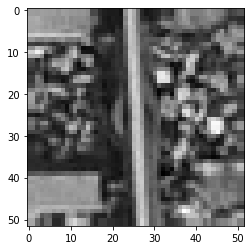

In [21]:
if __name__ == '__main__':
    posfeatures=[]
    h1=[]
    positive= 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/pos/'
    for image_file in os.listdir(positive):
        image = mpimg.imread(os.path.join(positive,image_file))
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image = np.float32(image)
        image /= 255
        image=np.resize(image,(100,100))
        
        coeffs2 = pywt.dwt2(image, 'bior1.3')
        LL, (LH, HL, HH) = coeffs2
        fig = plt.figure()
        for i, a in enumerate([LL]):
            ax = fig.add_subplot(1, 1, i + 1)
            ax.imshow(a, cmap=plt.cm.gray)
        
#    one method for finding hog............. !!
        hogfeatures, hog_image = waveleteTransform(image)
        featuresize=hogfeatures.size
        hogfeatures=np.reshape(hogfeatures,(featuresize,),order='C')
        hogfeatures= hogfeatures.reshape(1,-1)
        posfeatures.append(hogfeatures)
        tpos=np.concatenate(posfeatures)  
        h1.append(np.concatenate(posfeatures))
             
        

#for negative examples
    negfeatures=[]
    h2=[]
    negative= 'C:/Users/hp/Desktop/Mod1-IITR/fishplate/neg/'
    for image_file1 in os.listdir(negative):
        image1 = mpimg.imread(os.path.join(negative,image_file1))
        image1 = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        image1 = np.float32(image)
        image1 /= 255
        image1=np.resize(image1,(100,100))
        
        coeffs2 = pywt.dwt2(image1, 'bior1.3')
        LL, (LH, HL, HH) = coeffs2
        fig = plt.figure()
        for i, a in enumerate([LL]):
            ax = fig.add_subplot(1, 1, i + 1)
            ax.imshow(a, cmap=plt.cm.gray)
        
#    one method for finding hog............. !!
        hogfeatures, hog_image = waveleteTransform(image)
        featuresize1=hogfeatures1.size
        hogfeatures1=np.reshape(hogfeatures1,(featuresize1,),order='C')
        hogfeatures1= hogfeatures1.reshape(1,-1)

        negfeatures.append(hogfeatures1)
#        tpos=get_hogfeaturesmain(positive)
        t=np.concatenate(negfeatures)  
        h2.append(np.concatenate(negfeatures))
    
#SVM classification 
svc = LinearSVC()
X_scaler = StandardScaler() 
X = np.vstack((tpos,t))
X_scaler.fit(X)
scaled_X = X_scaler.transform(X)

y = np.hstack((np.ones(len(tpos)), np.zeros(len(t))))
rand_state = np.random.randint(0, 59)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.20, random_state=rand_state)
time1=time.time()
svm_model_linear=svc.fit(X_train, y_train)
t2 = time.time()

print(round(t2-time1, 2), 'Seconds to train SVC...')
svm_predictions = svm_model_linear.predict(X_test)
svm_predictions = svc.predict(X_test)
print('Test Accuracy of SVC = ',svm_model_linear.score(X_test, y_test))  


imdir = 'C:/Users/hp/Desktop/Mod1-IITR/test/'
xcord=[]
ycord1=[]
(winW, winH) = (100,100)
for image_file in os.listdir(imdir):
    image2 = mpimg.imread(os.path.join(imdir, image_file))

    on_windows=[]
    pred=[]
    clone = image2.copy()

    for (x, y, window) in sliding_window(image2, stepSize=32, windowSize=(winW, winH)):  # loop over the sliding window for each layer of the pyramid
        if window.shape[0] != winH or window.shape[1] != winW: # if the window does not meet our desired window size, ignore it
            continue
        windowstestfeat = search_windowfeature(window,color_space=color_space,orient=orient, pix_per_cell=pix_per_cell,cell_per_block=cell_per_block)  	# THIS IS WHERE YOU WOULD PROCESS YOUR WINDOW, SUCH AS APPLYING A
        testfeaturesh = X_scaler.transform(windowstestfeat) 
        prediction =svm_model_linear.predict(testfeaturesh) 
        pred.append(prediction)
        if prediction==1:
            on_windows.append(window)
            xcord.append(x)
            ycord1.append(y) 
            cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
            cv2.imshow("Window",clone)
        k=cv2.waitKey(1)
        
        time.sleep(0.025)